In [21]:
# Import necessary modules
import os 
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Pandas options
pd.set_option('display.max_columns', 500)

In [5]:
# Data path
data_path = '/mnt/sdb1/data_shgm/TU0616_csv/'

'/mnt/sdb1/data_shgm/TU0616_csv/tur.csv'

In [9]:
# Trips data which is going to be merged with the session dataset
trip_df = pd.read_csv(os.path.join(data_path, 'tur.csv'))

In [13]:
trip_df.shape # (429371, 74)

(429371, 74)

In [15]:
trip_df.columns

Index(['TurId', 'SessionId', 'TurNr', 'TripCount', 'DepartHH', 'DepartMM',
       'DepartMSM', 'ArrivalHH', 'ArrivalMM', 'ArrivalMSM', 'DestDwelTime',
       'OrigNUTS', 'OrigMuncode', 'OrigOldMuncode', 'OrigCityCode',
       'OrigNTMzone', 'OrigNearestStation', 'OrigDistNearestStation',
       'DestNUTS', 'DestMuncode', 'DestOldMuncode', 'DestCityCode',
       'DestNTMzone', 'DestNearestStation', 'DestDistNearestStation',
       'OrigPurp', 'DestPurp', 'DestEscortPurp', 'TripPurp', 'TripPurpGroup',
       'SimplWorktour', 'SimplWorkNumstop', 'GISdist', 'NumModes', 'SumLen',
       'SumMin', 'SumMotorLen', 'SumMotorMin', 'ModeChainType', 'PrimMode',
       'PrimModeDrivPass', 'SecMode', 'PrimModeSumlen', 'SecModeSumlen',
       'FirstMode', 'LastMode', 'PartyorAlone', 'PartyNumu10', 'PartyNum1017',
       'PartyNumAdults', 'BicType', 'CarPassDriver', 'CarPassContext',
       'CarUsageCarNo', 'PtTicketType', 'PtPrice', 'PtBicType', 'PtPrimMode',
       'PtAccMode', 'PtEgrMode', 'PtAccLe

In [18]:
trip_df.head()

,TurId,SessionId,TurNr,TripCount,DepartHH,DepartMM,DepartMSM,ArrivalHH,ArrivalMM,ArrivalMSM,DestDwelTime,OrigNUTS,OrigMuncode,OrigOldMuncode,OrigCityCode,OrigNTMzone,OrigNearestStation,OrigDistNearestStation,DestNUTS,DestMuncode,DestOldMuncode,DestCityCode,DestNTMzone,DestNearestStation,DestDistNearestStation,OrigPurp,DestPurp,DestEscortPurp,TripPurp,TripPurpGroup,SimplWorktour,SimplWorkNumstop,GISdist,NumModes,SumLen,SumMin,SumMotorLen,SumMotorMin,ModeChainType,PrimMode,PrimModeDrivPass,SecMode,PrimModeSumlen,SecModeSumlen,FirstMode,LastMode,PartyorAlone,PartyNumu10,PartyNum1017,PartyNumAdults,BicType,CarPassDriver,CarPassContext,CarUsageCarNo,PtTicketType,PtPrice,PtBicType,PtPrimMode,PtAccMode,PtEgrMode,PtAccLen,PtEgrLen,FirstStation,LastStation,TrainMode,TrainAccMode,TrainEgrMode,TrainAccLen,TrainEgrLen,TrainAccDist,TrainEgrDist,JourneyId,JourneyRole,GISdistJourneyStartP
0,47,50026,1,1.0,9.0,30.0,570.0,10.0,25.0,625.0,605.0,DK041,657.0,657.0,11007.0,657133.0,Herning ...,1.1,DK041,779.0,779.0,10791.0,779142.0,Skive ...,3.6,1.0,41.0,NaN,41,40,2,NaN,50.79,1.0,55.0,55.0,55.0,55.0,11.0,11.0,1.0,NaN,55.0,NaN,11.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,1.0,50.8
1,48,50026,2,1.0,20.0,30.0,1230.0,21.0,25.0,1285.0,NaN,DK041,779.0,779.0,10791.0,779142.0,Skive ...,3.6,DK041,657.0,657.0,11007.0,657133.0,Herning ...,1.1,41.0,1.0,NaN,41,40,2,NaN,50.79,1.0,55.0,55.0,55.0,55.0,11.0,11.0,1.0,NaN,55.0,NaN,11.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,0.0,0.0
2,49,50027,1,1.0,9.0,5.0,545.0,9.0,10.0,550.0,20.0,DK041,779.0,779.0,10791.0,779154.0,Skive ...,3.3,DK041,779.0,779.0,10791.0,779152.0,Skive ...,1.1,1.0,41.0,NaN,41,40,2,NaN,2.20,1.0,2.0,5.0,2.0,5.0,11.0,11.0,1.0,NaN,2.0,NaN,11.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,21.0,2.2
3,50,50027,2,1.0,9.0,30.0,570.0,9.0,40.0,580.0,35.0,DK041,779.0,779.0,10791.0,779152.0,Skive ...,1.1,DK041,779.0,779.0,10791.0,779141.0,Skive ...,2.8,41.0,31.0,NaN,31,30,2,NaN,2.12,1.0,3.5,10.0,3.5,10.0,11.0,11.0,1.0,NaN,3.5,NaN,11.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,1.0,2.6
4,51,50027,3,1.0,10.0,15.0,615.0,10.0,25.0,625.0,0.0,DK041,779.0,779.0,10791.0,779141.0,Skive ...,2.8,DK041,779.0,779.0,10791.0,779141.0,Skive ...,2.1,31.0,49.0,NaN,31,30,2,NaN,1.30,1.0,2.5,10.0,2.5,10.0,11.0,11.0,1.0,NaN,2.5,NaN,11.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,NaN,3.5


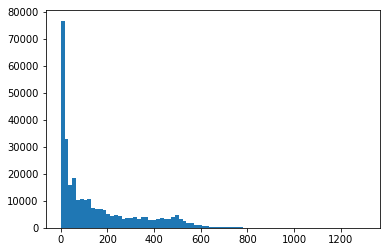

In [25]:
plt.hist(trip_df.DestDwelTime, bins=80); 
# Time people stay in the place they were meant to. It seems like a mixture of an exp distribution and a normal distribution
#  This could be a hint of two types of trips: one which is the "ocassional" trip: shopping, visits, etc and "work related" trip

In [35]:
trip_df.TripPurpGroup.value_counts()

40    155394
30    148699
11     82023
12     28027
50     15228
Name: TripPurpGroup, dtype: int64

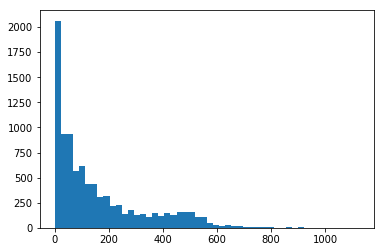

In [49]:
plt.hist(trip_df.DestDwelTime[trip_df.TripPurpGroup==50], bins=50); 

In [62]:
# The variables of interest from the tur dataset are:
trip_vars = [
    'SessionId',
    'PrimMode',
    'DepartHH',
    'DepartMM',
    'OrigMuncode',
    'DestMuncode',
    'TripPurpGroup',
    'DestDwelTime' # If instead we want to model the dwell time, however I think that my proposed approach is better   
]

In [50]:
# Socioeconomic dataset which is merged with the trips data, the datasets are merged using the 'SessionID' variable where the 
#  socioeconomic variables are repeated across trips
socio_df = pd.read_csv(os.path.join(data_path, 'session.csv'))

In [51]:
socio_df.head()

,SessionId,InterviewType,DiaryDate,DiaryYear,PseudoYear,DiaryMonth,DiaryWeekday,DiaryDaytype,HomeAdrNUTS,HomeAdrMunCode,HomeAdrOldMuncode,HomeAdrCityCode,HomeAdrCitySize,HomeAdrNTMzone,HomeAdrNearestStation,HomeAdrDistNearestStation,HomeParkPoss,RespSex,RespYearBorn,RespAgeSimple,RespAgeCorrect,RespMainOccup,RespEdulevel,PrimOccMuncode,PrimOccOldMuncode,PrimOccNTMzone,WorkHoursPw,WorkHourType,WorkPubPriv,WorkatHomeDayspM,SduMuncode,SduOldMuncode,SduNTMzone,GISdistHW,kmarbud,HwDayspW,HwDaysReason,WorkParkPoss,RespHasBicycle,RespHasSeasonticket,RespHasRejsekort,ResphasDrivlic,RespDrivlicYear,RespIsmemCarshare,HousehNumcars,HousehCarOwnership,Handicap,HousehAccomodation,HousehAccOwnorRent,IncRespondent,IncRespondent2000,IncSpouse,IncSpouse2000,IncNuclFamily,IncNuclFamily2000,IncFamily,IncFamily2000,IncHouseh,IncHouseh2000,NuclFamType,PosInFamily,NuclFamNumPers,NuclFamNumAdults,NuclFamNumPers1084,NuclFamNumDrivLic,FamNumPers,FamNumAdults,FamNumPers1084,FamNumDrivLic,HousehNumPers,HousehNumAdults,HousehNumPers1084,HousehNumDrivLic,DayStartNUTS,DayStartMuncode,DayStartOldMuncode,DayStartCityCode,DayStartNTMzone,DayStartJourneyRole,DayStartPurp,RespNotripReason,NightsAway,TotalNumTrips,NumTripsCorr,NumTripsExclComTrans,TotalLen,TotalLenExclComTrans,TotalMotorLen,TotalBicLen,TotalMin,TotalMotorMin,PrimModeDay,ModeChainTypeDay,DayNumJourneys,JstartType,JstartMuncode,JstartNTMzone,JstartNearestStation,JstartDistNearestStation,DayJourneyType,DayPrimTargetMuncode,DayPrimTargetPurp,SessionWeight
0,50068,0,13281,2006,2006/7,5,6,23,DK013,230,181.0,10289.0,7752.0,230045.0,Nærum ...,3.4,NaN,2,1967,39,38,30.0,11.0,230.0,181.0,230044.0,48.0,NaN,2.0,14.0,230.0,181.0,230045.0,1.6,5.0,1.0,4.0,11.0,2.0,2,NaN,1.0,1985.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,12.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,2.0,DK013,230.0,181.0,10289.0,230045.0,0.0,1.0,13.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0,0,NaN,NaN,0.0,3.0,230.0,230045.0,Nærum ...,3.4,1,230.0,1.0,204.182196
1,50070,0,13282,2006,2006/7,5,7,32,DK012,159,159.0,1100.0,1084885.0,159074.0,Stengården ...,0.4,NaN,1,1993,13,12,1.0,1.0,159.0,159.0,159073.0,NaN,NaN,NaN,NaN,159.0,159.0,159074.0,0.5,0.9,5.0,NaN,12.0,1.0,2,NaN,-18.0,NaN,NaN,1.0,0.0,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,20.0,4.0,2.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,2.0,4.0,1.0,DK012,159.0,159.0,1100.0,159074.0,0.0,1.0,13.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0,0,NaN,NaN,0.0,3.0,159.0,159074.0,Stengården ...,0.4,1,159.0,1.0,495.028999
2,50071,0,13282,2006,2006/7,5,7,32,DK011,101,101.0,1100.0,1084885.0,102151.0,Nørreport ...,0.4,NaN,1,1973,33,32,30.0,11.0,230.0,181.0,230031.0,37.0,NaN,1.0,0.0,101.0,101.0,102151.0,14.9,15.0,5.0,NaN,11.0,1.0,2,NaN,1.0,1992.0,2.0,1.0,1.0,2.0,NaN,3.0,330.0,293.0,240.0,213.0,570.0,506.0,570.0,506.0,570.0,506.0,20.0,11.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,DK011,101.0,101.0,1100.0,102151.0,0.0,1.0,NaN,NaN,2,2,2,0.6,0.6,0.0,0.0,10,0,1.0,1.0,1.0,2.0,101.0,102151.0,Nørreport ...,0.4,11,101.0,31.0,460.598736
3,50072,0,13282,2006,2006/7,5,7,32,DK050,840,833.0,10783.0,406.0,840052.0,Hobro ...,8.3,NaN,2,1960,46,45,30.0,5.0,840.0,833.0,840053.0,30.0,NaN,2.0,0.0,840.0,833.0,840052.0,5.2,5.0,5.0,NaN,11.0,1.0,2,NaN,1.0,1978.0,2.0,1.0,0.0,2.0,1.0,1.0,190.0,168.0,310.0,275.0,500.0,444.0,500.0,444.0,500.0,444.0,21.0,12.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0,4.0,DK050,840.0,833.0,10783.0,840052.0,0.0,1.0,NaN,NaN,2,2,2,150.0,150.0,150.0,0.0,150,150,11.0,11.0,1.0,2.0,840.0,840052.0,Hobro ...,8.3,11,661.0,41.0,113.629100
4,50073,0,13282,2006,2006/7,5,7,32,DK012,183,183.0,1100.0,1084885.0,183013.0,Ishøj ...,0.9,NaN,1,1946,60,59,30.0,3.0,165.0,165.0,165011.0,37.0,NaN,1.0,0.0,183.0,183.0,183013.0,7.4,NaN,5.0,NaN,11.0,1.0,2,NaN,1.0,1965.0,2.0,1.0,1.0,2.0,1.0,1.0,410.0,364.0,246.0,218.0,656.0,583.0,656.0,583.0,656.0,583.0,20.0,11.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,DK022,360.0,383.0,0.0,360144.0,1.0,44.0,NaN,NaN,1,1,1,146.0,146.0,146.0,0.0,85,85,11.0,11.0,0.5,2.0,183.0,183013.0,Ishøj

In [53]:
# The variables of interest from the session dataset are:
socio_vars = [
    'SessionId',
    'DiaryYear',
    'DiaryMonth',
    'DiaryWeekday',
    'DiaryDaytype',
    'HomeAdrMunCode',
    'RespSex',
    'RespAgeCorrect',
    'RespMainOccup',
    'RespEdulevel',
    'PrimOccMuncode',
    'WorkHoursPw',
    'RespHasBicycle',
    'RespHasSeasonticket',
    'HousehCarOwnership',
    'IncRespondent2000',
    'FamNumPers',
    'FamNumAdults', # To know if they have kids
    'DayStartMuncode'
]

In [63]:
trip_df  = trip_df[trip_vars]
socio_df = socio_df[socio_vars]

In [64]:
df = trip_df.merge(socio_df, how='left', on='SessionId')

In [67]:
df.head(20)

,SessionId,PrimMode,DepartHH,DepartMM,OrigMuncode,DestMuncode,TripPurpGroup,DestDwelTime,DiaryYear,DiaryMonth,DiaryWeekday,DiaryDaytype,HomeAdrMunCode,RespSex,RespAgeCorrect,RespMainOccup,RespEdulevel,PrimOccMuncode,WorkHoursPw,RespHasBicycle,RespHasSeasonticket,HousehCarOwnership,IncRespondent2000,FamNumPers,FamNumAdults,DayStartMuncode
0,50026,11.0,9.0,30.0,657.0,779.0,40,605.0,2006,5,5,33,657,2,69,10.0,13.0,NaN,NaN,1.0,2,1.0,136.0,2.0,2.0,657.0
1,50026,11.0,20.0,30.0,779.0,657.0,40,NaN,2006,5,5,33,657,2,69,10.0,13.0,NaN,NaN,1.0,2,1.0,136.0,2.0,2.0,657.0
2,50027,11.0,9.0,5.0,779.0,779.0,40,20.0,2006,5,5,33,779,1,51,30.0,11.0,779.0,37.0,1.0,2,2.0,297.0,2.0,2.0,779.0
3,50027,11.0,9.0,30.0,779.0,779.0,30,35.0,2006,5,5,33,779,1,51,30.0,11.0,779.0,37.0,1.0,2,2.0,297.0,2.0,2.0,779.0
4,50027,11.0,10.0,15.0,779.0,779.0,30,0.0,2006,5,5,33,779,1,51,30.0,11.0,779.0,37.0,1.0,2,2.0,297.0,2.0,2.0,779.0
5,50027,11.0,10.0,25.0,779.0,779.0,40,3.0,2006,5,5,33,779,1,51,30.0,11.0,779.0,37.0,1.0,2,2.0,297.0,2.0,2.0,779.0
6,50027,11.0,10.0,30.0,779.0,779.0,40,0.0,2006,5,5,33,779,1,51,30.0,11.0,779.0,37.0,1.0,2,2.0,297.0,2.0,2.0,779.0
7,50027,11.0,10.0,40.0,779.0,779.0,40,0.0,2006,5,5,33,779,1,51,30.0,11.0,779.0,37.0,1.0,2,2.0,297.0,2.0,2.0,779.0
8,50027,11.0,10.0,45.0,779.0,779.0,30,0.0,2006,5,5,33,779,1,51,30.0,11.0,779.0,37.0,1.0,2,2.0,297.0,2.0,2.0,779.0
9,50027,11.0,10.0,55.0,779.0,779.0,30,NaN,2006,5,5,33,779,1,51,30.0,11.0,779.0,37.0,1.0,2,2.0,297.0,2.0,2.0,779.0


In [ ]:
TripPurpGroup: Multinomial
DestMuncode: Multinomial
PrimMode: Multinomial

DestDwelTime: Optional
    OrigMuncode: Explanatory
    # Time variables
    DepartHH
    DepartMM
    DiaryYear
    DiaryMonth
    DiaryWeekday
    DiaryDaytype
    
    # Socio-economic variables
    RespSex
    RespAgeCorrect
    RespMainOccup
    RespEdulevel
    IncRespondent2000
    FamNumPers-FamNumAdults (Has kids)
    
    # Mobility variables
    HomeAdrMunCode
    PrimOccMuncode
    WorkHoursPw
    RespHasBicycle
    RespHasSeasonticket
    HousehCarOwnership
      
    DayStartMuncode